# ResSkan - arkusz przeliczeń rezystancji

przy pomocy podanego arkusza można przeliczyć wyniki otrzymane w pomiarze w aparaturze ResSkan na wartości fizyczne.

**Wprowadź nazwę pliku do analizy w polu poniżej**

In [1]:
PIK = "tst/CoSb3.rs3"

**Następnie z menu wybierz [Kernel] -> [Restart & Run ll]**

Poglądowe wyniki zostaną przedstawione na wykresach, a wyniki finalny zostanie wyeksportowany do pliku csv w katalogu pliku źródłowego

dict_keys(['settings', 'meas', 'status', 'pnts'])


agregating data: 100%|███████████████████████████████████████████████████████████████| 399/399 [00:06<00:00, 66.28it/s]


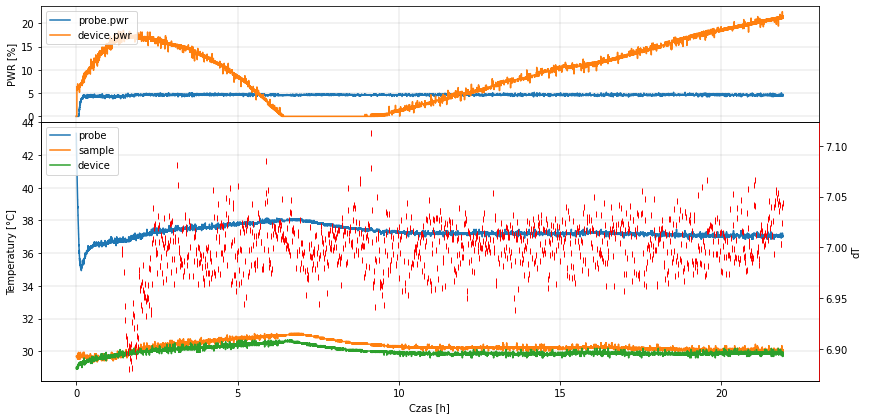

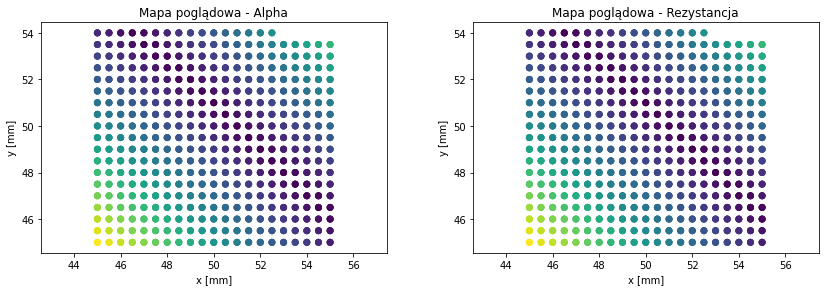

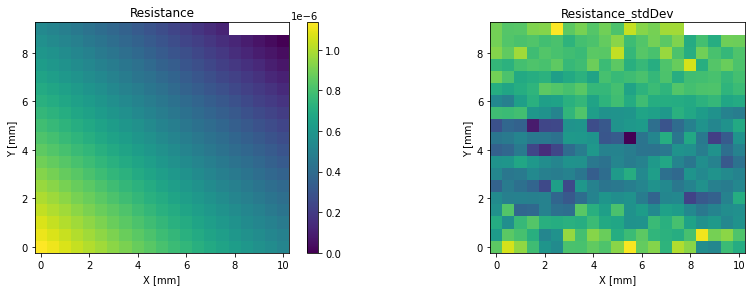

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm_notebook = tqdm

from ResSkanMath import CalcPnt, agregate_data, XYMapPlot

with open(PIK, "rb") as f:
    data = pickle.load(f)
    
print(data.keys())
settings = data.get('settings', None)
meas = data.get('meas', None)
drun = data.get('status', None)
pnts = data.get('pnts', None)
offset_correction = data.get('zero_correction', None)
slope_correction = data.get('slopa_correction', None)

with open('prevPlots.py') as fd:
    exec(fd.read())
    
dout = pd.DataFrame(columns=meas.columns)
#                                               "agregating data"
for _, pnt in tqdm_notebook(pnts.items(), desc= "raw recalc prog"):
    pnt_recalced = CalcPnt(pnt).copy()
    dd = pd.DataFrame([pnt_recalced.values()], columns=pnt_recalced.keys())
    dout = pd.concat([dout, dd])
    
agregated = agregate_data(dout)
XYMapPlot(agregated, "Resistance", "Resistance_stdDev", offset="move_to_zero")
dout.to_csv(PIK+".csv")